# **Appliviu High Resolution TryOn Demo**


<div style="overflow: hidden;">
  <img src="https://www.appliviu.com/image/logo.png" width="150" alt="Image" style="float: right; margin-left: 100px;">
</div>



# **1.Setup**

In [ ]:
# shutil.rmtree("/content/HRVITON_Rhizobee_TryOn_HD")

In [ ]:
import os
import shutil
from google.colab import files

In [ ]:
# clone repository
!git clone https://github.com/RhizobeeInnovation/HRVITON_Rhizobee_TryOn_HD.git
# install dependencies
!pip install tensorboardX av torchgeometry iglovikov_helper_functions cloths_segmentation albumentations --quiet --no-color
!pip install scipy==1.8.0 --quiet --no-color
# install detectron2
%cd /content/HRVITON_Rhizobee_TryOn_HD
# if os.path.exists("detectron2"):
#     shutil.rmtree("detectron2")
# !git clone https://github.com/facebookresearch/detectron2.git
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git' --quiet --no-color

Cloning into 'HRVITON_Rhizobee_TryOn_HD'...
remote: Enumerating objects: 1204, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (176/176), done.
remote: Total 1204 (delta 102), reused 223 (delta 93), pack-reused 925
Receiving objects: 100% (1204/1204), 13.28 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (353/353), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.5/64.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 93.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **2. Downloading the Pre-trained Models**

In [ ]:
!pip install --upgrade --no-cache-dir gdown --quiet --no-color

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download --quiet
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download --quiet
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download --quiet
%cd ../

/content/HRVITON_Rhizobee_TryOn_HD/HR-VITON-main
/bin/bash: --quiet: command not found
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=368d3307-c96a-4151-afb6-a8b1909bd60a
To: /content/HRVITON_Rhizobee_TryOn_HD/HR-VITON-main/gen.pth
100% 402M/402M [00:06<00:00, 61.0MB/s]
/bin/bash: --quiet: command not found
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=36bea827-39ab-4a6e-a9b6-cc30a0eff17c
To: /content/HRVITON_Rhizobee_TryOn_HD/HR-VITON-main/mtviton.pth
100% 190M/190M [00:06<00:00, 28.4MB/s]
/content/HRVITON_Rhizobee_TryOn_HD
/content/HRVITON_Rhizobee_TryOn_HD/Graphonomy-master
/bin/bash: --quiet: command not found
Downloading...
From (uriginal): https://drive.google.com/u/0/uc?id=1eUe

# **3. Upload Cloth Images**

In [ ]:
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
  if os.path.exists(input_dir+'/cloth_web.jpg'):
    os.remove(input_dir+'/cloth_web.jpg')

os.rename(input_path, input_dir+'/cloth_web.jpg')


Saving 00000_00.jpg to 00000_00.jpg


# **4. Upload Person Images**

In [ ]:
input_dir = 'static'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
  if os.path.exists(input_dir+'/origin_web.jpg'):
    os.remove(input_dir+'/origin_web.jpg')

os.rename(input_path, input_dir+'/origin_web.jpg')

Saving 00055_00.jpg to 00055_00.jpg


# **5. View Uploaded Images**

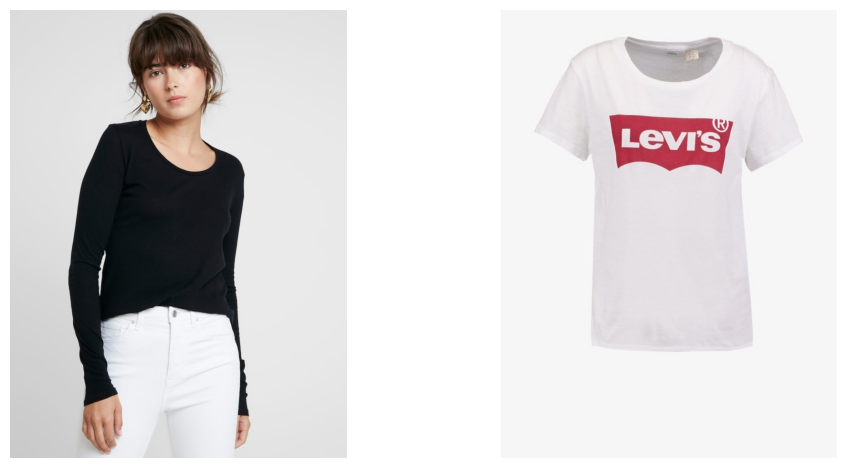

In [ ]:
import matplotlib.pyplot as plt
import cv2

original = cv2.cvtColor(cv2.imread("./static/origin_web.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./static/cloth_web.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(original)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

# **6. Run to run Try-On**

In [ ]:
!python main.py #--background False

Get mask of cloth

Downloading: "https://github.com/ternaus/cloths_segmentation/releases/download/0.0.1/weights.zip" to /root/.cache/torch/hub/checkpoints/weights.zip
100% 47.0M/47.0M [00:00<00:00, 50.6MB/s]
Get openpose coordinate using posenet

Generate semantic segmentation using Graphonomy-Master library

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
load model: ./inference.pth
time used for the multi-scale image inference is :6.869116771000108

Generate Densepose image using detectron2 library

[07/09 09:28:11 apply_net]: Loading config from detectron2/projects/DensePose/configs/densepose_rcnn_R_50_FPN_s1x.yaml
[07/09 09:28:11 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
model_final_162be9.pkl: 256MB [00:11, 22.8MB/s]               
[07/09 09:28:24 apply_net]: Loading data from origin.jpg
/usr/local/lib/python3.10/dist-packages/torch/functi

# **7. View Results**

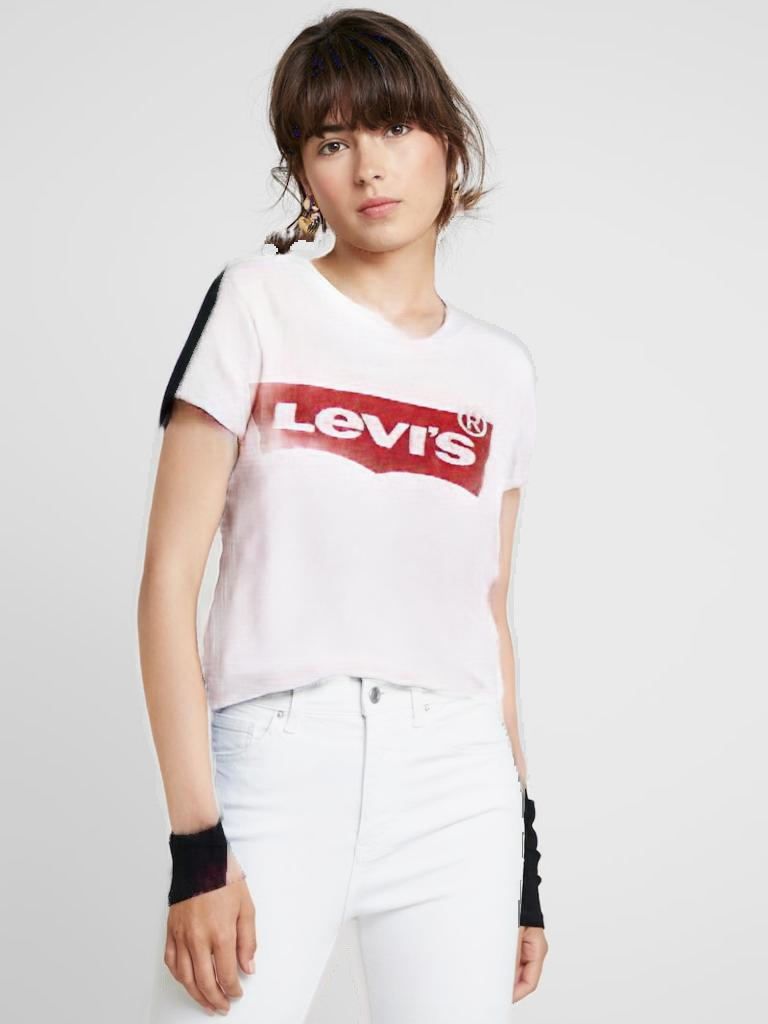

In [ ]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./static/finalimg.png")
display(image1)




```
# Thank you!
```





# **Streamlit App**

In [ ]:
!pip install -q streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.0 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/HRVITON_Rhizobee_TryOn_HD/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/HRVITON_Rhizobee_TryOn_HD/package.json'
npm WARN HRVITON_Rhizobee_TryOn_HD No description
npm WARN HRVITON_Rhizobee_TryOn_HD No repository field.
npm WARN HRVITON_Rhizobee_TryOn_HD No README data
npm WARN HRVITON_Rhizobee_TryOn_HD No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 3.116s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!pip install -q streamlit_option_menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 799.2/799.2 kB 22.3 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
from streamlit_option_menu import option_menu
import os
from PIL import Image

def main2():
    st.set_page_config(page_title="Appliviu_TryOn",
                        page_icon="🧊")


    def save_uploaded_file(uploaded_file, folder, filename):
        with open(os.path.join(folder, filename), "wb") as f:
            f.write(uploaded_file.getbuffer())

    def check_and_delete_file(folder, filename):
        file_path = os.path.join(folder, filename)
        if os.path.exists(file_path):
            os.remove(file_path)
            # st.success("Existing file deleted successfully!")
            return True
        else:
            # st.warning("File does not exist!")
            return False


    selected = option_menu(
        menu_title="Appliviu TryOn",
        options= ["Person Image", "Cloth Image", "TryOn Result"],
        icons = ["box-arrow-up", "box-arrow-up", "file-image-fill"],
        menu_icon="home-door",
        default_index=0,
        orientation= "horizontal"

    )

    if selected == "Person Image":
        st.title("Person Image! :smile:")

        folder_person = "/content/HRVITON_Rhizobee_TryOn_HD/static"  # Folder where the photos will be saved

        if not os.path.exists(folder_person):
            os.makedirs(folder_person)

        uploaded_person = st.file_uploader("Upload a person photo", type=["png", "jpg", "jpeg"], key="person")


        if uploaded_person is not None:
            check_and_delete_file(folder_person, "origin_web.jpg")
            save_uploaded_file(uploaded_person, folder_person, "origin_web.jpg")
            st.success("Person Image Uploaded!")


    if selected == "Cloth Image":
        st.title("Cloth Image! :smile:")
        folder_cloth = "/content/HRVITON_Rhizobee_TryOn_HD/static"  # Folder where the photos will be saved
        if not os.path.exists(folder_cloth):
            os.makedirs(folder_cloth)

        uploaded_cloth = st.file_uploader("Upload a cloth photo", type=["png", "jpg", "jpeg"],  key="cloth")

        if uploaded_cloth is not None:
            check_and_delete_file(folder_cloth, "cloth_web.jpgg")
            save_uploaded_file(uploaded_cloth, folder_cloth, "cloth_web.jpg")
            st.success("Cloth Image Uploaded!")


    if selected == "TryOn Result":
        st.title("TryOn Image! :smile:")

        if st.button(":white[Click to generate your TryOn ]", use_container_width=True):
            with st.spinner('Wait for it...'):
              terminnal_command = "python ./main.py --background False"
              os.system(terminnal_command)
              st.success('Done!')

            # Specify the path to the image file
            image_path = "/content/HRVITON_Rhizobee_TryOn_HD/static/finalimg.png"

            # Display the image
            image_output = Image.open(image_path)

            st.image(image_output, caption="Virtual TryOn generated Image!")

if __name__ == '__main__':
    main2()

Writing app.py


In [ ]:
!streamlit run app.py &>logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com
# Run this cell and copy the endpoint e.g 104.155.147.50
# Open the URL and paste it there!

35.204.184.210
npx: installed 22 in 3.692s
your url is: https://hot-regions-greet.loca.lt
